You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

#### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

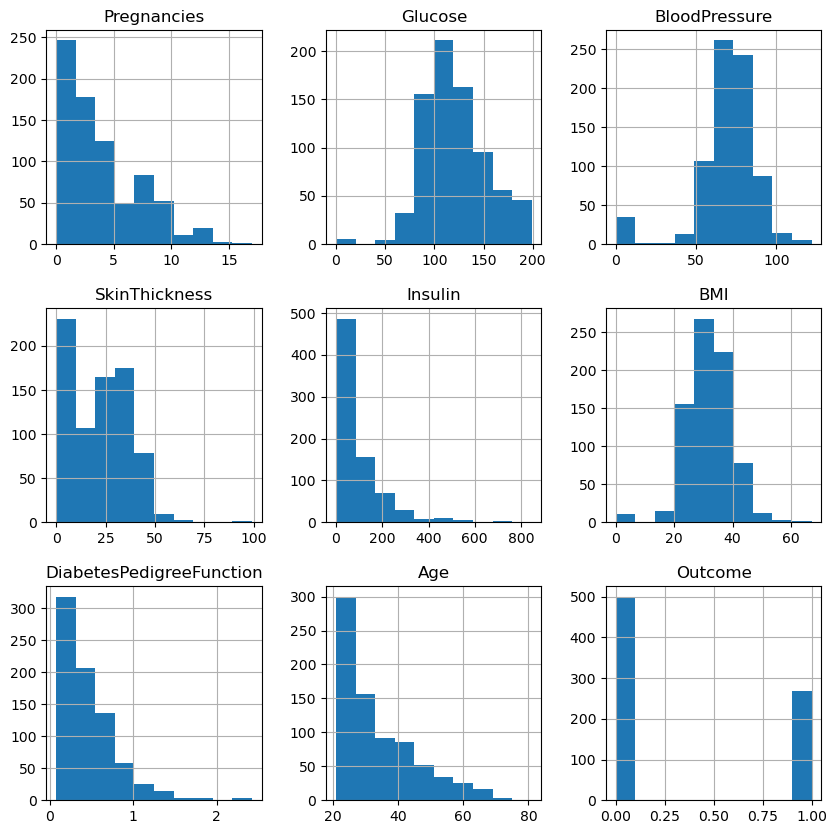

In [5]:
df.hist(figsize=(10,10))

<AxesSubplot: >

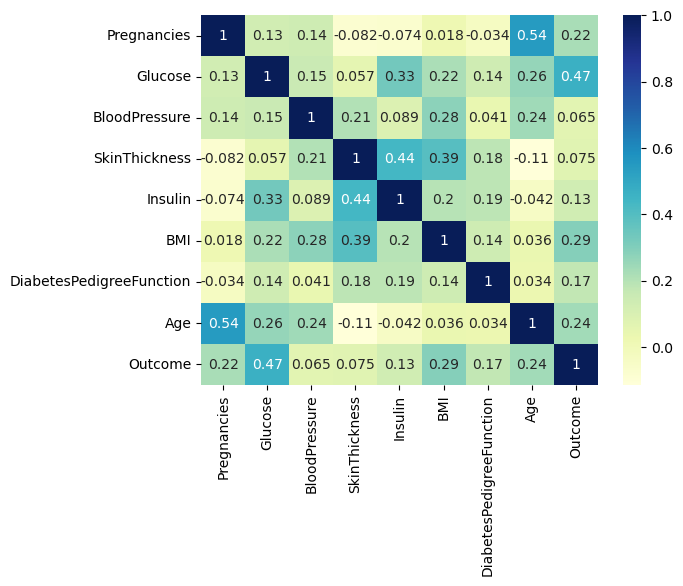

In [6]:
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

#### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
df['Glucose'] = df['Glucose'].replace([0], np.nan)
df['BloodPressure'] = df['BloodPressure'].replace([0], np.nan)
df['SkinThickness'] = df['SkinThickness'].replace([0], np.nan)
df['Insulin'] = df['Insulin'].replace([0], np.nan)
df['BMI'] = df['BMI'].replace([0], np.nan)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace([0], np.nan)
df['Age'] = df['Age'].replace([0], np.nan)

In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

IndexError: index 8 is out of bounds for axis 0 with size 8

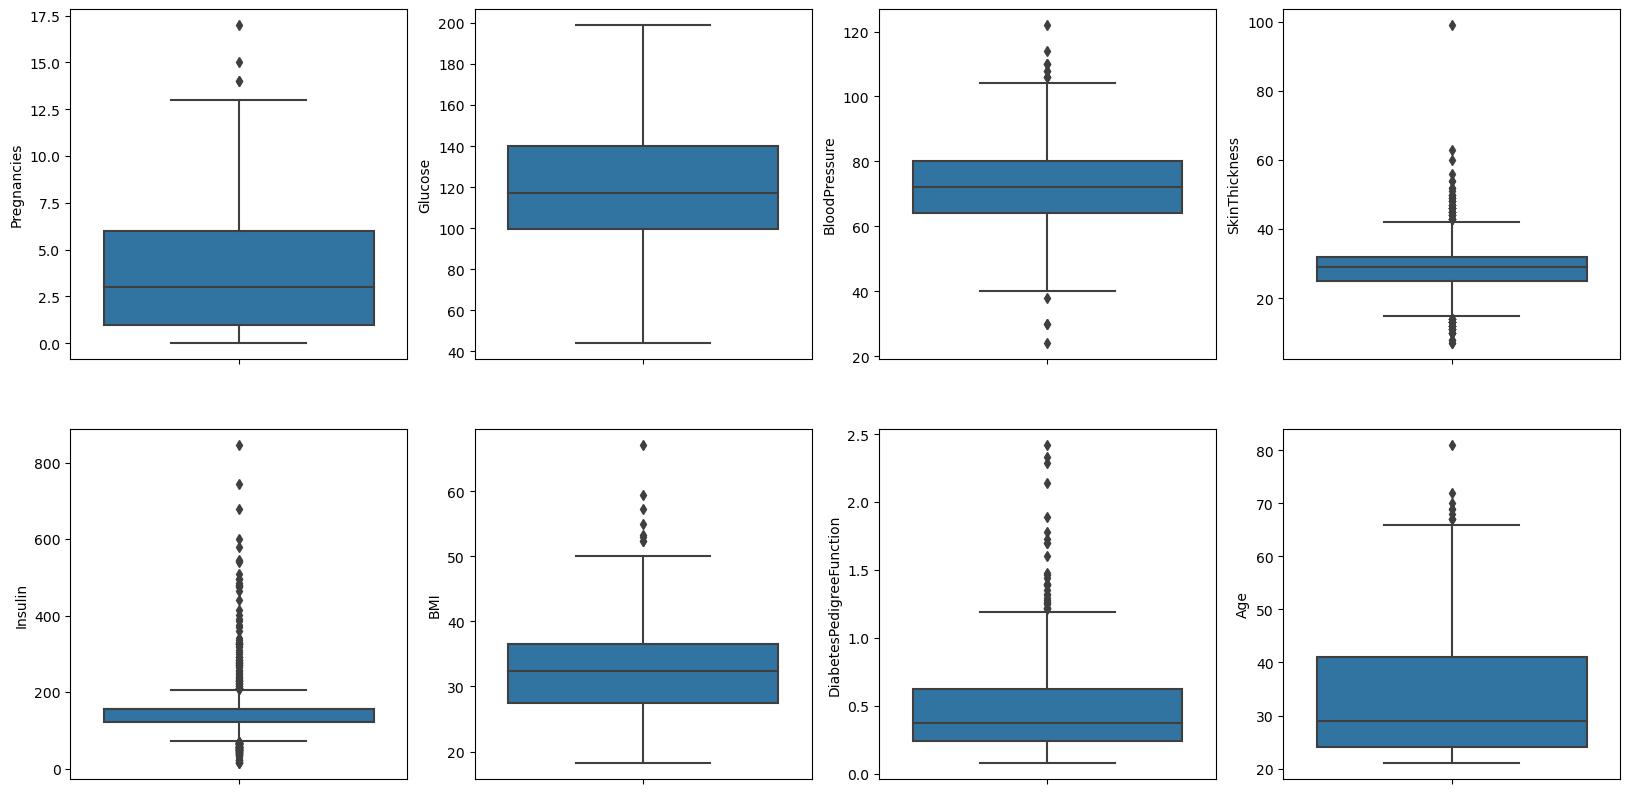

In [13]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout

In [14]:
# Remove outliers
df = df[(df['Glucose'] < 200) & (df['Glucose'] > 50)]
df = df[(df['BloodPressure'] < 100) & (df['BloodPressure'] > 40)]
df = df[(df['SkinThickness'] < 70) & (df['SkinThickness'] > 10)]
df = df[(df['Insulin'] < 600)]
df = df[(df['BMI'] < 50)]

In [15]:
# Transform categorical variables into dummy variables
df = pd.get_dummies(df, columns=['Pregnancies'], prefix='Pregnancies')

#### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4]}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [18]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [21]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=4)

#### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.7671232876712328
Precision: 0.6551724137931034
Recall: 0.7307692307692307
F1 Score: 0.6909090909090909


In [24]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[74 20]
 [14 38]]


In [25]:
y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC Score:', auc_score)

AUC Score: 0.8183306055646482


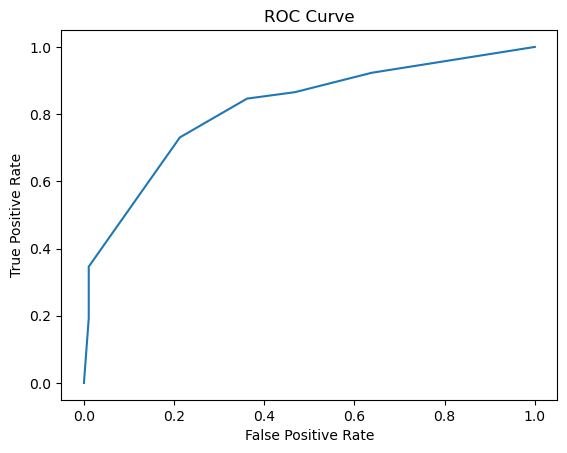

In [26]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

|--- Glucose <= 154.50
|   |--- BMI <= 26.35
|   |   |--- Insulin <= 48.50
|   |   |   |--- DiabetesPedigreeFunction <= 0.55
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.55
|   |   |   |   |--- class: 0
|   |   |--- Insulin >  48.50
|   |   |   |--- class: 0
|   |--- BMI >  26.35
|   |   |--- Age <= 28.50
|   |   |   |--- SkinThickness <= 28.50
|   |   |   |   |--- class: 0
|   |   |   |--- SkinThickness >  28.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  28.50
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  99.50
|   |   |   |   |--- class: 1
|--- Glucose >  154.50
|   |--- BMI <= 29.85
|   |   |--- Age <= 53.50
|   |   |   |--- Age <= 25.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  25.50
|   |   |   |   |--- class: 1
|   |   |--- Age >  53.50
|   |   |   |--- class: 0
|   |--- BMI >  29.85
|   |   |--- Insulin <= 87.50
|   |   |   |--- class: 0
|   |   |--- Insulin >  87.50
|   |   |   |---

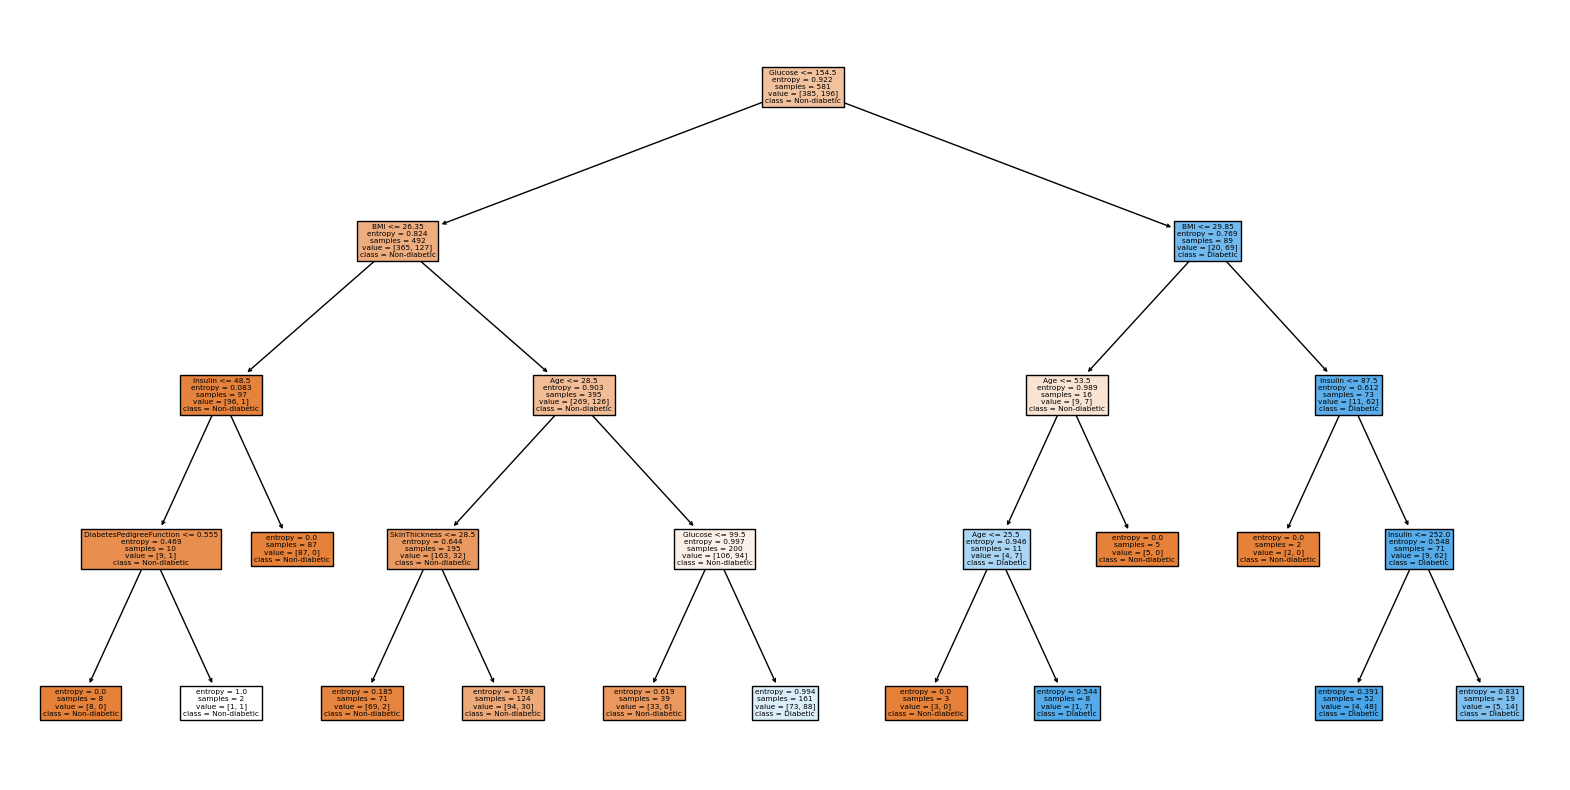

In [27]:
from sklearn.tree import export_text, plot_tree

tree_text = export_text(clf, feature_names=X.columns.tolist())
print(tree_text)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Non-diabetic', 'Diabetic'], filled=True)
plt.show()

#### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

Ans: To validate the decision tree model, we can apply it to new data or test its robustness to changes in the dataset or the environment. This can be done by repeating the preprocessing steps and evaluating the performance of the model on a separate test dataset.

We can also perform sensitivity analysis and scenario testing to explore the uncertainty and risks associated with the model. For example, we can test the robustness of the model to changes in the decision thresholds or the inclusion of additional variables. We can also test the model on datasets from different populations or regions to assess its generalizability.

For applying this I don't have new data. So ddin't applied.